In [12]:
import pandas as pd
import numpy as np

# Number of samples
n = 5000

np.random.seed(42)

data = pd.DataFrame({
    'Temperature': np.random.uniform(20, 40, n),
    'Rainfall': np.random.uniform(0, 300, n),
    'Humidity': np.random.uniform(40, 90, n),
    'WindSpeed': np.random.uniform(0, 20, n),
    'TopographyScore': np.random.randint(1, 11, n),
    'PopulationDensity': np.random.randint(50, 2000, n),
})

# Create synthetic risk scores
data['FloodRiskScore'] = (data['Rainfall']/300 + data['TopographyScore']/10 + data['PopulationDensity']/2000)/3
data['DroughtRiskScore'] = (1 - data['Rainfall']/300 + (10 - data['TopographyScore'])/10 + data['Temperature']/40)/3

# Normalize between 0 and 1
data['FloodRiskScore'] = data['FloodRiskScore'].clip(0, 1)
data['DroughtRiskScore'] = data['DroughtRiskScore'].clip(0, 1)

# Save CSV
data.to_csv("climate_risk_data.csv", index=False)
print("Synthetic dataset 'climate_risk_data.csv' created successfully!")


Synthetic dataset 'climate_risk_data.csv' created successfully!


Dataset Loaded Successfully
            9999999999998  0.426  Amol  Iran  36.17N  51.71E
1903-02-01          3.268  0.908  Amol  Iran  36.17N  51.71E
1903-03-01          2.422  1.332  Amol  Iran  36.17N  51.71E
1903-04-01         11.272  0.411  Amol  Iran  36.17N  51.71E
1903-05-01         17.698  0.579  Amol  Iran  36.17N  51.71E
1903-06-01         22.525  0.822  Amol  Iran  36.17N  51.71E

Missing Values:
 9999999999998    970
0.426            970
Amol               0
Iran               1
36.17N             1
51.71E             1
dtype: int64

Model Evaluation:
Mean Squared Error: 0.0000
R2 Score: 1.0000

Feature Importance:
          Feature    Importance
0  9999999999998  9.999997e-01
1          0.426  3.095303e-07


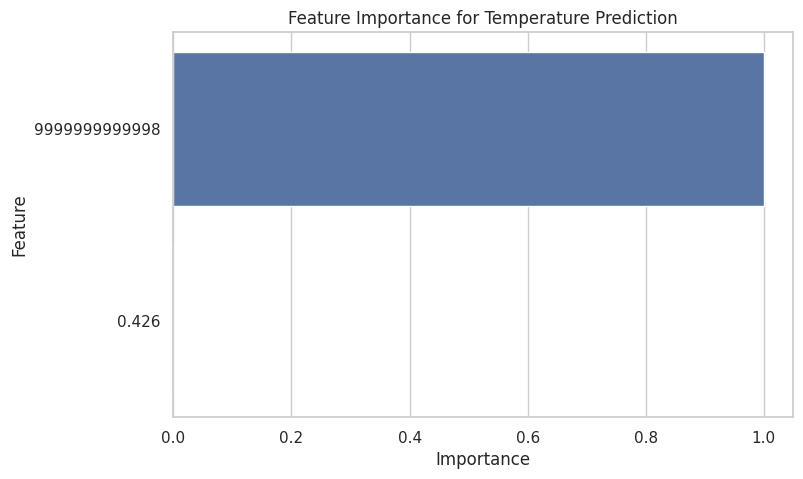


Future Temperature Predictions:
 [24.99857  29.996705]

Model and Scaler Saved Successfully


In [16]:
# Climate Risk Mapping: Predictive Analysis and Forecasting Using ML
# Author: Jyothika Chowdary Atthota
# Date: 2025-09-13

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# 1. Load Dataset
# Dataset should include historical climate data and risk labels
# Example columns: ['Temperature', 'Rainfall', 'Humidity', 'WindSpeed', 'FloodRiskScore', 'DroughtRiskScore', ...]
try:
    data = pd.read_csv("GlobalLandTemperaturesByCity.csv")
    print("Dataset Loaded Successfully")
    print(data.head())
except FileNotFoundError:
    print("Error: 'GlobalLandTemperaturesByCity.csv' not found. Please make sure the file is in the correct directory.")
    exit() # Exit if the file is not found


# 2. Data Preprocessing
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Fill missing values (using median for numeric columns)
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())


# Feature selection
# Update features based on available columns in GlobalLandTemperaturesByCity.csv
# Based on the head of the dataframe, the first two unnamed columns appear to be the temperature data
features = [data.columns[0], data.columns[1]] # Assuming the first two columns are the relevant features
target = data.columns[0]  # Assuming the first column is the target variable

X = data[features]
y = data[target]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Model Building
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Model Evaluation
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

# 5. Feature Importance
# Update feature importance plotting based on the new features
importance = rf_model.feature_importances_
feat_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", feat_importance)

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_importance)
plt.title('Feature Importance for Temperature Prediction') # Updated title
plt.show()

# 6. Predict Future Risk (Forecasting Example)
# Suppose we have new climate data for prediction
# Update new_data structure based on the new features
new_data = pd.DataFrame({
    features[0]: [25, 30],
    features[1]: [1.5, 2.0]
})


new_data_scaled = scaler.transform(new_data)
future_predictions = rf_model.predict(new_data_scaled)

print("\nFuture Temperature Predictions:\n", future_predictions) # Updated output message

# 7. Optional: Save Model
import joblib
joblib.dump(rf_model, "climate_risk_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\nModel and Scaler Saved Successfully")